Data Source - https://www.kaggle.com/mlg-ulb/creditcardfraud
Data Source is a highly imbalanced dataset which is balanced in this i python notebook using SMOTE, A synthetic minority oversampling technique.
In this code we read the original csv and see the imbalance in the data. After observing the imbalance we go ahead and apply the smote method for removing the data imbalance. The visualization after smote is shown in "CCFD SMOTE Ensemble + DAE.ipynb"


In [1]:
'''So now the idea is to train it correctly and set/adjust the threshold so that confusion matrix is 
set in such way that accuracy is high. Now accuracy is the correct measure to consider as we have exactly 50-50% balanced dataset
for each class for training.
'''

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./creditcard.csv')

Read the original data file and remove the noisy columns keep the columns which are important to make the prediction correctly.

In [3]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','V7','V11','V12'], axis =1)
print("columns dropped.")

columns dropped.


In [5]:
df[df.Class == 0].shape

(284315, 17)

In [6]:
df[df.Class == 1].shape

(492, 17)

We can observe that for 284315 normal samples we have 492 fraud transactions. This is a huge imbalance leading the models to show high bias towards normal transaction.

Text(0, 0.5, 'Number of Occurances')

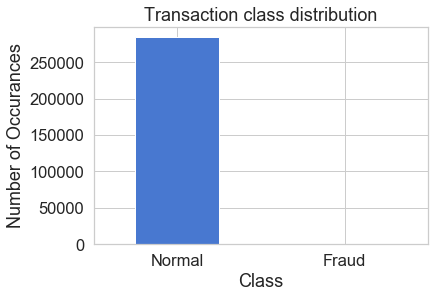

In [4]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Number of Occurances")

Using Feature scaling using minmaxscaling.

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in df.columns:
    if col == 'Class':
        continue
    df[col] = scaler.fit_transform(df[[col]])

Creating a test train split, 80% data is used for training, 20% data is used for testing.

In [6]:
Y = df['Class']
X = df.drop('Class',axis=1)
x_train, x_val, y_train, y_val = train_test_split(X, Y,
                                                  test_size = .2,
                                                  random_state=12)

Applying SMOTE on the training data and creating Synthetic Samples.

In [7]:
#SMOTE CODE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
x_train = x_train_res
y_train = y_train_res

C:\Users\d071556\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
x_train = pd.DataFrame(x_train_res)
y_train = pd.DataFrame(y_train_res)
x_train.columns = X.columns
y_train = pd.DataFrame(y_train_res)
Y = pd.DataFrame(Y)
y_train.columns = Y.columns
######################################################
x_test = pd.DataFrame(x_val)
y_test = pd.DataFrame(y_val)
x_test.head()

,Time,V1,V2,V3,V4,V5,V6,V9,V10,V14,V16,V17,V18,V19,V21,Amount
214164,0.807670,0.995829,0.749633,0.834810,0.174485,0.755046,0.267426,0.430891,0.542838,0.619353,0.459929,0.725150,0.720315,0.563823,0.560384,0.000930
10783,0.106249,0.889119,0.819275,0.672388,0.508681,0.733588,0.229768,0.349183,0.282014,0.204645,0.135777,0.251382,0.301532,0.719631,0.585717,0.003503
228456,0.842163,0.939104,0.773098,0.868715,0.251993,0.765248,0.270578,0.452194,0.496676,0.654537,0.470683,0.702728,0.727451,0.519925,0.565991,0.005210
253376,0.904116,0.991599,0.764975,0.830818,0.301168,0.763227,0.263156,0.489740,0.517364,0.656266,0.475610,0.697006,0.727351,0.540899,0.565244,0.000000
243213,0.878756,0.940254,0.771667,0.850931,0.136860,0.774222,0.279082,0.476031,0.493868,0.638193,0.457856,0.712536,0.590956,0.420173,0.563812,0.000473


In [9]:
result = pd.concat([x_train, y_train], axis = 1)
result.head()
from sklearn.utils import shuffle
df = shuffle(result)
df.head()
data = df
################################################################
result = pd.concat([x_test, y_test], axis = 1)
test_df = shuffle(result)


In [10]:
df.to_csv('ccfd_train.csv',index=False)
test_df.to_csv('ccfd_test.csv',index=False)

In [11]:
print('Files created successfully.')

Files created successfully.
